In [1]:
import numpy as np

from matplotlib import pyplot as plt
import lightkurve as lk
from astropy.timeseries import TimeSeries, LombScargle
import astropy.units as u
from astropy.visualization import simple_norm

%matplotlib inline


/Users/guenther/mambaforge/envs/ml_workshop/lib/python3.11/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/guenther/.lightkurve/cache. Please move all the files in the legacy directory /Users/guenther/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
search_result = lk.search_lightcurve('KIC 8112039', author='Kepler')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 03,2009,Kepler,60,kplr008112039,0.0
1,Kepler Quarter 00,2009,Kepler,1800,kplr008112039,0.0
2,Kepler Quarter 01,2009,Kepler,1800,kplr008112039,0.0
3,Kepler Quarter 02,2009,Kepler,1800,kplr008112039,0.0
4,Kepler Quarter 03,2009,Kepler,1800,kplr008112039,0.0
5,Kepler Quarter 04,2010,Kepler,1800,kplr008112039,0.0
6,Kepler Quarter 05,2010,Kepler,1800,kplr008112039,0.0
7,Kepler Quarter 06,2010,Kepler,1800,kplr008112039,0.0
8,Kepler Quarter 07,2010,Kepler,1800,kplr008112039,0.0


In [3]:
sr = search_result[0]

In [4]:
lc = sr.download()

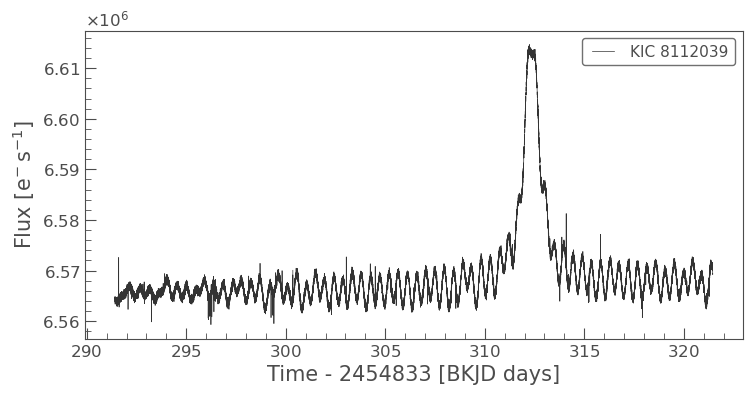

In [5]:
out = lc.plot()

In [6]:
ts = TimeSeries(lc[300:500])

In [8]:
ind = np.isfinite(lc.flux)

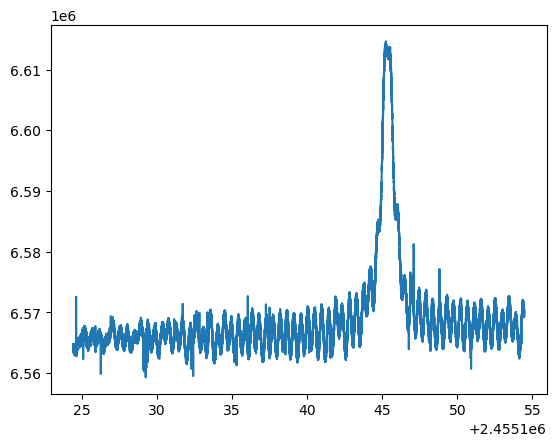

In [9]:
plt.plot(lc.time.jd[ind], lc.flux[ind])

In [10]:
ind = np.isfinite(lc.flux) & np.isfinite(lc.time.jd)
ls = LombScargle(lc.time.jd[ind], lc.flux[ind], center_data=True)

In [11]:
frequency = np.linspace(0.1, 5, 1000)
power = ls.power(frequency=frequency)

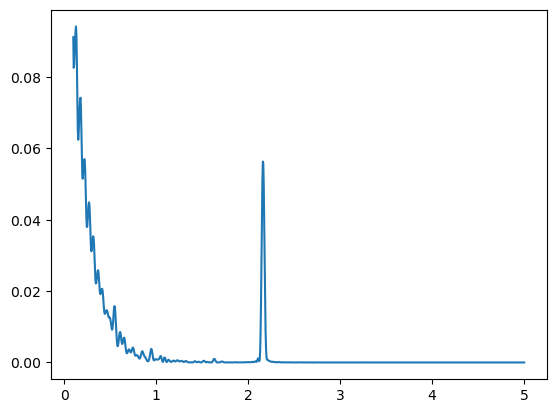

In [12]:
plt.plot(frequency, power)

In [13]:
maxpow = np.max(power[frequency > 1])
maxfreq = frequency[power == maxpow]

In [14]:
maxfreq

array([2.16006006])

In [15]:
flux = lc.flux[ind]

In [16]:
closest_n = int(np.round((1 * u.d /maxfreq[0]) / (lc.time[1] - lc.time[0])))
nrows = int(flux.shape[0] / closest_n)

In [17]:
im = np.array(flux[: nrows * closest_n])
im = im.reshape(nrows, closest_n)

In [18]:
im = im - np.median(im, axis=1)[:, None]

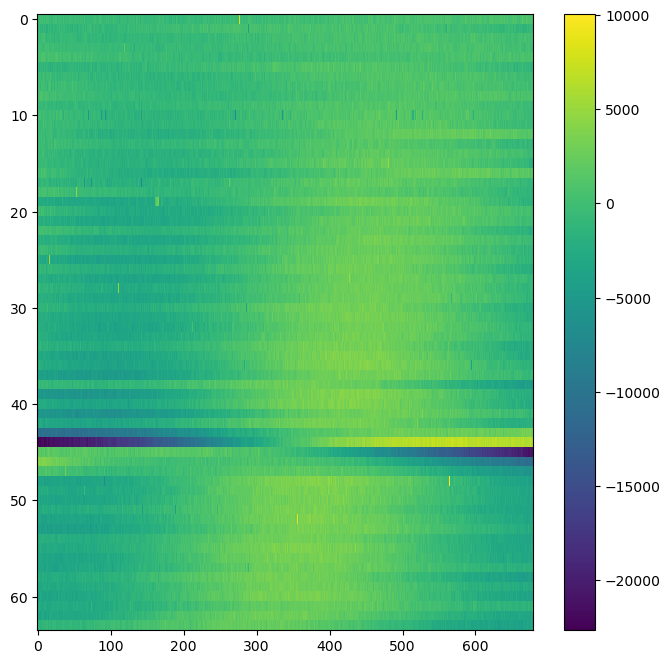

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
norm = simple_norm(im, 'linear')
imp = ax.imshow(im, aspect='auto', norm=norm, interpolation='nearest', cmap='viridis')
plt.colorbar(imp, ax=ax)